# Importing Modules

In [48]:
# for data representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for splitting the data into training and test
from sklearn.model_selection import train_test_split

# for measuring the accuracy
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# for encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# different models for testing
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.ensemble import RandomForestClassifier #Random Forest

# for dumping the model
import pickle

# for warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df = pd.read_csv('./Fertilizer_Prediction.csv')

# Visualizing the Data

In [3]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [4]:
df.tail()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP
98,29,58,57,Black,Sugarcane,12,0,10,20-20


In [5]:
df.size

891

In [6]:
df.shape

(99, 9)

In [7]:
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [8]:
df['Soil Type'].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [9]:
df['Crop Type'].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [10]:
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [11]:
df.dtypes

Temparature         int64
Humidity            int64
Moisture            int64
Soil Type          object
Crop Type          object
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer Name    object
dtype: object

In [12]:
df['Soil Type'].value_counts()

Loamy     21
Sandy     20
Clayey    20
Black     19
Red       19
Name: Soil Type, dtype: int64

In [13]:
df['Crop Type'].value_counts()

Sugarcane      13
Cotton         12
Millets        11
Paddy          10
Pulses         10
Wheat           9
Tobacco         7
Barley          7
Oil seeds       7
Ground Nuts     7
Maize           6
Name: Crop Type, dtype: int64

In [14]:
df['Fertilizer Name'].value_counts()

Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: Fertilizer Name, dtype: int64

# Encoding the categorical data

## Using One Hot Encoder

In [15]:
y = df['Fertilizer Name'].copy() #defining the target
y

0         Urea
1          DAP
2     14-35-14
3        28-28
4         Urea
        ...   
94       28-28
95    10-26-26
96        Urea
97         DAP
98       20-20
Name: Fertilizer Name, Length: 99, dtype: object

In [16]:
x = df.drop('Fertilizer Name', axis=1).copy() #everything except the target
x

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,26,52,38,Sandy,Maize,37,0,0
1,29,52,45,Loamy,Sugarcane,12,0,36
2,34,65,62,Black,Cotton,7,9,30
3,32,62,34,Red,Tobacco,22,0,20
4,28,54,46,Clayey,Paddy,35,0,0
...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19
95,30,60,27,Red,Tobacco,4,17,17
96,38,72,51,Loamy,Wheat,39,0,0
97,36,60,43,Sandy,Millets,15,0,41


In [17]:
df #data including target

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [18]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3,4])], remainder='passthrough') #to encode Soil n Crop types
x = np.array(ct.fit_transform(x)) #encoding Soil n Crop Types

In [19]:
x[0] #data after encoding

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., 26., 52., 38., 37.,  0.,  0.])

#### Splitting the data into Training and Testing
Training: 80%
Testing: 20%

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)

#### Scaling the data 

In [21]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train) #learn parameters and apply the transformation to new data
x_test = sc.transform(x_test) #apply the learned transformation

In [22]:
x_train[0]

array([-0.48412292, -0.50395263, -0.54321448, -0.48412292,  2.06559112,
       -0.25993762, -0.33567254, -0.31180478,  4.33012702, -0.38069349,
       -0.25993762, -0.33567254, -0.33567254, -0.42320737, -0.23094011,
       -0.33567254,  0.76462082,  0.80219471,  0.71373089, -1.15292671,
        0.91259936,  0.80677787])

In [23]:
# Initialzing empty lists to append all model's name and corresponding accuracy
acc = []
model = []

### Random Forest

In [24]:
RF = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
RF.fit(x_train,y_train)
predicted_values = RF.predict(x_test)

accuracy = metrics.accuracy_score(y_test, predicted_values)
acc.append(accuracy)
model.append('RF')

print("RF's Accuracy is: ", accuracy)
print(classification_report(y_test,predicted_values))

RF's Accuracy is:  0.95
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       1.00      1.00      1.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.86      0.79      0.81        20
weighted avg       1.00      0.95      0.97        20



### Naive Bayes

In [25]:
NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train,y_train)
predicted_values = NaiveBayes.predict(x_test)

accuracy = metrics.accuracy_score(y_test, predicted_values)
acc.append(accuracy)
model.append('Naive Bayes')

print("Naive Bayes's Accuracy is: ", accuracy)
print(classification_report(y_test, predicted_values))

Naive Bayes's Accuracy is:  0.5
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       0.00      0.00      0.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       0.17      1.00      0.29         1
       28-28       0.67      0.80      0.73         5
         DAP       1.00      0.60      0.75         5
        Urea       1.00      0.17      0.29         6

    accuracy                           0.50        20
   macro avg       0.55      0.44      0.39        20
weighted avg       0.82      0.50      0.54        20



### Decision Tree

In [26]:
DecisionTree = DecisionTreeClassifier(random_state=42)
DecisionTree.fit(x_train, y_train)
predicted_values = DecisionTree.predict(x_test)

accuracy = metrics.accuracy_score(y_test, predicted_values)
acc.append(accuracy)
model.append('Decision Tree')

print("DecisionTrees's Accuracy is: ", accuracy)
print(classification_report(y_test,predicted_values))

DecisionTrees's Accuracy is:  1.0
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         2
    14-35-14       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



### Logistic Regression

In [27]:
LogReg = LogisticRegression(random_state=42)
LogReg.fit(x_train,y_train)
predicted_values = LogReg.predict(x_test)

accuracy = metrics.accuracy_score(y_test, predicted_values)
acc.append(accuracy)
model.append('Logistic Regression')

print("Logistic Regression's Accuracy is: ", accuracy)
print(classification_report(y_test,predicted_values))

Logistic Regression's Accuracy is:  0.9
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       0.50      1.00      0.67         1
       20-20       1.00      1.00      1.00         1
       28-28       1.00      0.80      0.89         5
         DAP       0.83      1.00      0.91         5
        Urea       1.00      1.00      1.00         6

    accuracy                           0.90        20
   macro avg       0.89      0.88      0.86        20
weighted avg       0.93      0.90      0.90        20



### Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

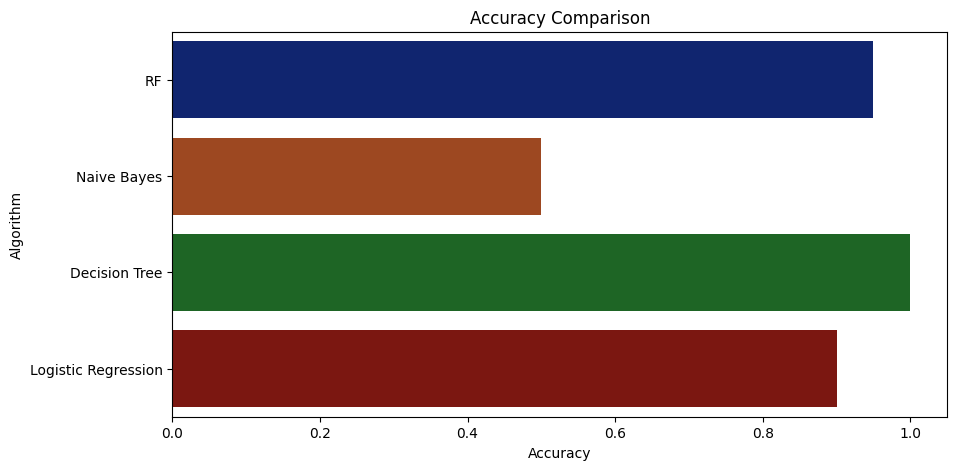

In [28]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [30]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v*100)

RF --> 95.0
Naive Bayes --> 50.0
Decision Tree --> 100.0
Logistic Regression --> 90.0


## Using Label Encoder

In [31]:
encode_soil = LabelEncoder()
df['Soil Type'] = encode_soil.fit_transform(df['Soil Type'])

Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type

,Encoded
Original,
Black,0
Clayey,1
Loamy,2
Red,3
Sandy,4


In [32]:
encode_crop =  LabelEncoder()
df['Crop Type'] = encode_crop.fit_transform(df['Crop Type'])

Crop_Type = pd.DataFrame(zip(encode_crop.classes_,encode_crop.transform(encode_crop.classes_)),columns=['Original','Encoded'])
Crop_Type = Crop_Type.set_index('Original')
Crop_Type

,Encoded
Original,
Barley,0
Cotton,1
Ground Nuts,2
Maize,3
Millets,4
Oil seeds,5
Paddy,6
Pulses,7
Sugarcane,8


In [33]:
encode_fertilizer = LabelEncoder()
df['Fertilizer Name'] = encode_fertilizer.fit_transform(df['Fertilizer Name'])

#creating the DataFrame
Fertilizer = pd.DataFrame(zip(encode_fertilizer.classes_,encode_fertilizer.transform(encode_fertilizer.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer

,Encoded
Original,
10-26-26,0
14-35-14,1
17-17-17,2
20-20,3
28-28,4
DAP,5
Urea,6


#### Splitting the data into Training and Testing
Training: 80% Testing: 20%

In [34]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Fertilizer Name',axis=1),df['Fertilizer Name'],test_size=0.2,random_state=42)

In [35]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 49 to 51
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Temparature  79 non-null     int64
 1   Humidity     79 non-null     int64
 2   Moisture     79 non-null     int64
 3   Soil Type    79 non-null     int32
 4   Crop Type    79 non-null     int32
 5   Nitrogen     79 non-null     int64
 6   Potassium    79 non-null     int64
 7   Phosphorous  79 non-null     int64
dtypes: int32(2), int64(6)
memory usage: 4.9 KB


In [37]:
# Initialzing empty lists to append all model's name and corresponding accuracy
acc2 = []
model2 = []

### Random Forest

In [38]:
RF2 = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
RF2.fit(x_train,y_train)
predicted_values = RF2.predict(x_test)

accuracy = metrics.accuracy_score(y_test, predicted_values)
acc2.append(accuracy)
model2.append('RF')

print("RF's Accuracy is: ", accuracy)
print(classification_report(y_test,predicted_values))

RF's Accuracy is:  0.95
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.86      0.79      0.81        20
weighted avg       1.00      0.95      0.97        20



### Naive Bayes

In [39]:
NaiveBayes2 = GaussianNB()
NaiveBayes2.fit(x_train,y_train)
predicted_values = NaiveBayes2.predict(x_test)

accuracy = metrics.accuracy_score(y_test, predicted_values)
acc2.append(accuracy)
model2.append('Naive Bayes')

print("Naive Bayes's Accuracy is: ", accuracy)
print(classification_report(y_test, predicted_values))

Naive Bayes's Accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



### Decision Tree

In [40]:
DecisionTree2 = DecisionTreeClassifier(random_state=42)
DecisionTree2.fit(x_train, y_train)
predicted_values = DecisionTree2.predict(x_test)

accuracy = metrics.accuracy_score(y_test, predicted_values)
acc2.append(accuracy)
model2.append('Decision Tree')

print("DecisionTrees's Accuracy is: ", accuracy)
print(classification_report(y_test,predicted_values))

DecisionTrees's Accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



### Logistic Regression

In [41]:
LogReg2 = LogisticRegression(random_state=42)
LogReg2.fit(x_train,y_train)
predicted_values = LogReg2.predict(x_test)

accuracy = metrics.accuracy_score(y_test, predicted_values)
acc2.append(accuracy)
model2.append('Logistic Regression')

print("Logistic Regression's Accuracy is: ", accuracy)
print(classification_report(y_test,predicted_values))

Logistic Regression's Accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



### Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

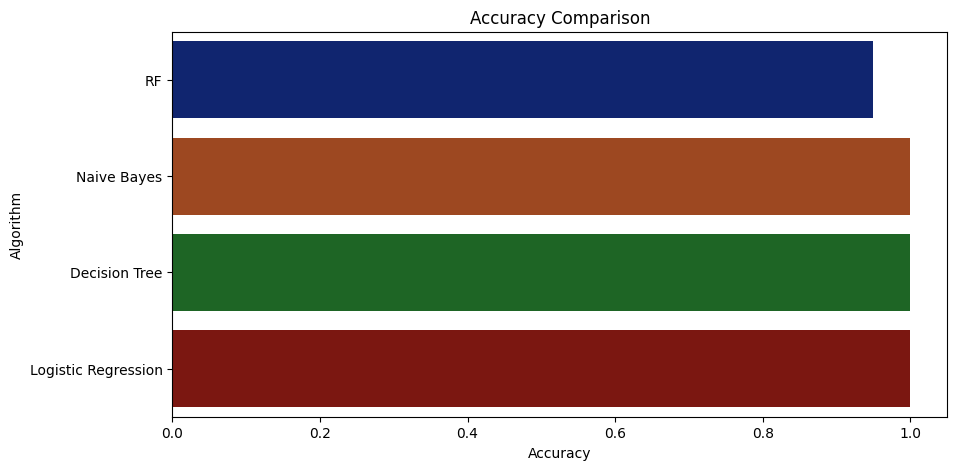

In [44]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc2,y = model2,palette='dark')

In [46]:
accuracy_models = dict(zip(model2, acc2))
for k, v in accuracy_models.items():
    print (k, '-->', v*100)

RF --> 95.0
Naive Bayes --> 100.0
Decision Tree --> 100.0
Logistic Regression --> 100.0


# Saving Model

In [50]:
DT_pkl_filename = '../fertilizer_prediction.pkl'
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree2, DT_Model_pkl)
DT_Model_pkl.close()

## Testing

In [60]:
data = np.array([[11, 23, 28, encode_soil.fit_transform(['Loamy']), encode_crop.fit_transform(['Paddy']), 22, 16, 93]])
result = DecisionTree2.predict(data)
print(result)

result = encode_fertilizer.inverse_transform(result)
print(result)

[5]
['DAP']
